# [RQ3] Which teams have the youngest coaches?

#  Dataframe of coaches

In [6]:
#Convert coaches.json to Dataframe and clean it
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
coaches = pd.read_json(r'C:\Users\simo2\coaches.json')
clean_coaches = coaches.drop(['birthArea','lastName','middleName','firstName','currentTeamId','passportArea'], axis=1)
clean_coaches.head()

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398


In [7]:
#Load the json matches dataset
with open(r'C:\Users\simo2\OneDrive\Desktop\matches_England.json') as json_data:
    json_matches = json.load(json_data)

# Dictionary which has team-coaches pairs

In [8]:
#Store in a dictionary every coaches that team had in the season using teams as keys
dictionary_of_teams={}    
for i in range(len(json_matches)):
    list_keys=[*(json_matches[i]['teamsData'])]
    for key in list_keys:
        ID=json_matches[i]['teamsData'][key]['coachId']
        TEAM=json_matches[i]['teamsData'][key]['teamId']
        if TEAM not in dictionary_of_teams:
            dictionary_of_teams[TEAM]=[]
        if TEAM in dictionary_of_teams and ID not in dictionary_of_teams[TEAM] and ID != 0 :    
            dictionary_of_teams[TEAM].append(ID)
dictionary_of_teams            

{1646: [8880],
 1659: [8934],
 1628: [8357, 268775],
 1627: [7973, 9454, 149026],
 1609: [7845],
 1673: [18572],
 1651: [8093],
 1612: [14791],
 1644: [93112, 71037],
 1611: [3295],
 1613: [210700, 531745],
 1610: [272869, 20454],
 1625: [267136],
 1619: [9054, 254174],
 10531: [32573, 381291],
 1639: [8329, 9054],
 1631: [209010, 8214, 333782],
 1624: [3782, 292863],
 1623: [8541, 434992, 268779],
 1633: [8235, 269869]}

In [11]:
#Convert teams.json to Dataframe and clean it
teams_dataframe = pd.read_json(r'C:\Users\simo2\teams.json')
teams_dataframe = teams_dataframe.drop(["area", "city", "type","officialName"], axis=1)
teams_dataframe.rename(columns={'wyId':'teams'}, inplace=True)
teams_dataframe.head()

,name,teams
0,Newcastle United,1613
1,Celta de Vigo,692
2,Espanyol,691
3,Deportivo Alav\u00e9s,696
4,Levante,695


# From the dictionary to a dataframe

In [10]:
#Convert the dictionary to a dataframe

coaches_teams_dataframe = pd.DataFrame([(key, var) for (key, L) in dictionary_of_teams.items() for var in L], 
                 columns=['teams', 'wyId'])  
coaches_teams_dataframe.head()

,teams,wyId
0,1646,8880
1,1659,8934
2,1628,8357
3,1628,268775
4,1627,7973


# Merging dataframes

In [12]:
# Merge dataframes to obtain a final dataframe with coaches,coaches' birthdays and teams
mergedDataframe_coaches_teams = (pd.merge(coaches_teams_dataframe, clean_coaches, on='wyId'))
final_dataframe = (pd.merge(mergedDataframe_coaches_teams, teams_dataframe, on='teams'))
final_dataframe = final_dataframe.drop(['teams','wyId'],axis=1)

#Sort the dataset based on the birthDate columns and delete Antonio Conte row because he was two times in the dataset 

final_dataframe = final_dataframe.sort_values(by=['birthDate'], ascending=False) 
final_dataframe = final_dataframe.drop(16)#drop Conte
final_dataframe

,birthDate,shortName,name
1,1977-11-29,E. Howe,AFC Bournemouth
12,1977-07-12,Marco Silva,Watford
26,1975-12-04,M. Appleton,Leicester City
30,1973-10-16,D. Unsworth,Everton
15,1973-02-19,Paco,Newcastle United
28,1972-03-02,M. Pochettino,Tottenham Hotspur
24,1972-01-08,P. Clement,Swansea City
8,1971-10-19,D. Wagner,Huddersfield Town
20,1971-10-05,M. Pellegrino,Southampton
0,1971-06-28,S. Dyche,Burnley


# Eliminating duplicates

In [13]:
#Delete coaches that are from the same team and keeping only the youngest coach

clean_final_dataframe = final_dataframe.drop_duplicates(subset='name', keep='first')
clean_final_dataframe

,birthDate,shortName,name
1,1977-11-29,E. Howe,AFC Bournemouth
12,1977-07-12,Marco Silva,Watford
26,1975-12-04,M. Appleton,Leicester City
30,1973-10-16,D. Unsworth,Everton
15,1973-02-19,Paco,Newcastle United
28,1972-03-02,M. Pochettino,Tottenham Hotspur
24,1972-01-08,P. Clement,Swansea City
8,1971-10-19,D. Wagner,Huddersfield Town
20,1971-10-05,M. Pellegrino,Southampton
0,1971-06-28,S. Dyche,Burnley


# The 10 teams with the youngest coaches

In [14]:
#Print the 10 teams with the youngest coaches
print(clean_final_dataframe.name[:10].to_string(index=False))

   AFC Bournemouth
           Watford
    Leicester City
           Everton
  Newcastle United
 Tottenham Hotspur
      Swansea City
 Huddersfield Town
       Southampton
           Burnley


We want to define a function that converts Birthdates to Ages.

In [16]:
#Define a function that takes a birthDate and return the age

def convert_age(s):
    age =(pd.to_datetime('today').year-pd.to_datetime(s).year)
    return age

# Boxplot

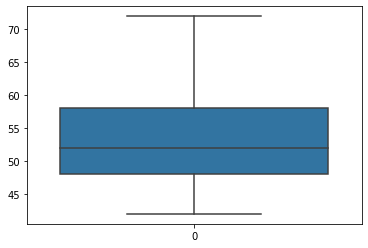

In [17]:
#Apply the function to every element of the column 'birthDate',rename the column and print the boxplot
final_dataframe['birthDate'] = final_dataframe['birthDate'].apply(convert_age)
final_dataframe.rename(columns={'birthDate': 'age'}, inplace=True)
sns.boxplot(data=final_dataframe['age'])
